<a href="https://colab.research.google.com/github/Kiki-Ervin/Tugas-Praktikum-permodelan/blob/main/Praktikum_Pemodelan_Dan_Simulasi_Tugas_8_Simulasi_Pembagian_Kelompok_Menggunakian_RNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hasil RNG:
Iterasi | Z_prev | Rumus               | Z     | U
1        | 7      | (5 * 7) mod 16     | 3     | 0.188
2        | 3      | (5 * 3) mod 16     | 15    | 0.938
3        | 15     | (5 * 15) mod 16    | 11    | 0.688
4        | 11     | (5 * 11) mod 16    | 7     | 0.438
5        | 7      | (5 * 7) mod 16     | 3     | 0.188
6        | 3      | (5 * 3) mod 16     | 15    | 0.938
7        | 15     | (5 * 15) mod 16    | 11    | 0.688
8        | 11     | (5 * 11) mod 16    | 7     | 0.438
9        | 7      | (5 * 7) mod 16     | 3     | 0.188
10       | 3      | (5 * 3) mod 16     | 15    | 0.938
11       | 15     | (5 * 15) mod 16    | 11    | 0.688
12       | 11     | (5 * 11) mod 16    | 7     | 0.438
13       | 7      | (5 * 7) mod 16     | 3     | 0.188
14       | 3      | (5 * 3) mod 16     | 15    | 0.938
15       | 15     | (5 * 15) mod 16    | 11    | 0.688
16       | 11     | (5 * 11) mod 16    | 7     | 0.438
17       | 7      | (5 * 7) mod 16     | 3     | 0.188
18 

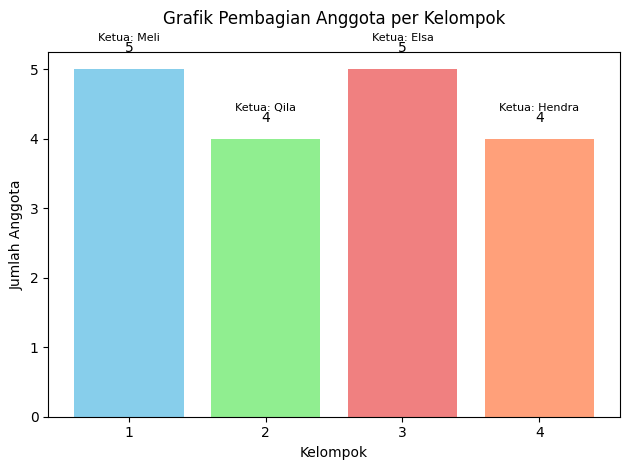

In [53]:
import random
import matplotlib.pyplot as plt

# Parameter RNG
Z0 = 7  # Bilangan awal (seed)
a = 5   # Konstanta pengali
m = 16  # Modulus
n = 18  # Jumlah bilangan acak yang akan dihasilkan (jumlah anggota)

# Daftar nama anggota
anggota = ['Ali', 'Budi', 'Citra', 'Dedi', 'Elsa', 'Fadil', 'Gita', 'Hendra', 'Indra', 'Joko',
           'Kiki', 'Lala', 'Meli', 'Niko', 'Oki', 'Putri', 'Qila', 'Rudi']

# Inisialisasi daftar untuk menyimpan hasil
results = []
Z = Z0  # Bilangan awal

# Menghitung bilangan acak menggunakan RNG
for i in range(1, n + 1):
    Z_prev = Z  # Menyimpan bilangan sebelumnya
    Z = (a * Z) % m  # Menghitung bilangan acak selanjutnya
    U = Z / m  # Menghitung bilangan acak seragam
    rumus = f"(5 * {Z_prev}) mod {m}"  # Rumus yang digunakan
    results.append([i, Z_prev, rumus, Z, round(U, 3)])  # Menyimpan hasil

# Menampilkan hasil RNG
print("Hasil RNG:")
print("Iterasi | Z_prev | Rumus               | Z     | U")
for row in results:
    print(f"{row[0]:<8} | {row[1]:<6} | {row[2]:<18} | {row[3]:<5} | {row[4]}")

# Pembagian kelompok secara acak dengan 4 atau 5 anggota per kelompok
kelompok = []
remaining_members = anggota.copy()

# Mengacak urutan anggota terlebih dahulu
random.shuffle(remaining_members)

# Tentukan jumlah anggota kelompok secara acak (4 atau 5 orang per kelompok)
while len(remaining_members) > 5:
    group_size = random.choice([4, 5])  # Ukuran kelompok acak antara 4 atau 5
    kelompok.append(remaining_members[:group_size])
    remaining_members = remaining_members[group_size:]

# Masukkan sisa anggota (tidak kurang dari 4) ke kelompok terakhir
if remaining_members:
    kelompok.append(remaining_members)

# Pemilihan ketua secara acak untuk setiap kelompok
ketua = {}
for i, anggota_kelompok in enumerate(kelompok, 1):
    ketua[i] = random.choice(anggota_kelompok)  # Pilih ketua secara acak dari anggota kelompok

# Menampilkan pembagian kelompok dan ketua
print("\nPembagian Kelompok dan Ketua:")
for i, anggota_kelompok in enumerate(kelompok, 1):
    print(f"Kelompok {i}: {anggota_kelompok}")
    print(f"  Ketua: {ketua[i]}")

# Menampilkan grafik pembagian kelompok dengan penyesuaian
kelompok_counts = [len(k) for k in kelompok]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightyellow']  # Warna berbeda untuk setiap kelompok

plt.bar(range(1, len(kelompok) + 1), kelompok_counts, color=colors[:len(kelompok)])
plt.xlabel('Kelompok')
plt.ylabel('Jumlah Anggota')
plt.title('Grafik Pembagian Anggota per Kelompok', pad=20)  # Memberi jarak antara judul dan grafik

# Menambahkan label jumlah anggota di atas bar
for i, count in enumerate(kelompok_counts):
    plt.text(i + 1, count + 0.2, str(count), ha='center', va='bottom', fontsize=10)

# Menambahkan label ketua di atas bar yang sesuai dan memberikan jarak agar tidak tumpang tindih
for i, ketua_name in ketua.items():
    plt.text(i, kelompok_counts[i-1] + 0.4, f"Ketua: {ketua_name}", ha='center', fontsize=8, color='black')

plt.xticks(range(1, len(kelompok) + 1))
plt.tight_layout()  # Menyesuaikan layout agar elemen tidak saling tumpang tindih
plt.show()
